<a href="https://colab.research.google.com/github/RaviSadam/About-HTML/blob/main/Boston_House_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Boston House Prices
Linear Regrassion Model to predit the House prices based on following parameters

- price \\
- area \\
- bedrooms \\
- bathrooms \\
- stories \\
- mainroad \\
- guestroom \\
- basement \\
- hotwaterheating \\
- airconditioning \\
- parking	prefarea \\
- furnishingstatus \\


In [3]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
housing_data_frame=pd.read_csv("Housing.csv")
housing_data_frame

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [5]:
housing_data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
housing_data_frame.describe()
numerical=["area","bedrooms","bathrooms","stories","parking"]
non_numerical=["mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea","furnishingstatus"]


In [7]:
housing_data_frame.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [8]:
housing_data_frame.duplicated().sum()
housing_data_frame.drop_duplicates(inplace=True)

In [9]:
fig=make_subplots(rows=3,cols=2);
fig.add_trace(go.Box(x=housing_data_frame["price"],name="Price"),row=1,col=1)
fig.add_trace(go.Box(x=housing_data_frame["area"],name="area"),row=1,col=2)
fig.add_trace(go.Box(x=housing_data_frame["bedrooms"],name="Bedrooms"),row=2,col=1)
fig.add_trace(go.Box(x=housing_data_frame["bathrooms"],name="Bathrooms"),row=2,col=2)
fig.add_trace(go.Box(x=housing_data_frame["stories"],name="Stories"),row=3,col=1)
fig.add_trace(go.Box(x=housing_data_frame["parking"],name="Parking"),row=3,col=2)
fig.update_layout(width=800,height=1100,showlegend=False)
fig.show()

In [42]:
numerical=housing_data_frame.select_dtypes(exclude="object").columns
for col in numerical:
  Q1=housing_data_frame[col].quantile(0.25)
  Q3=housing_data_frame[col].quantile(0.75)
  IQR=Q3-Q1
  lower_bound=Q1-1.5*IQR
  upper_bound=Q3+1.5*IQR
  outlier=housing_data_frame[(housing_data_frame[col]<lower_bound) | (housing_data_frame[col]> upper_bound)]
  print(f"{col} has {len(outlier)} outliers")
  # print(outlier.shape[0])


price has 15 outliers
15
area has 12 outliers
12
bedrooms has 12 outliers
12
bathrooms has 1 outliers
1
stories has 41 outliers
41
parking has 12 outliers
12


In [11]:
fig=make_subplots(rows=3,cols=2,subplot_titles=("Area","Bedrooms","Bathrooms","Stories","Parking",""))
fig.add_trace(go.Histogram(x=housing_data_frame["area"],name="Area"),row=1,col=1)
fig.add_trace(go.Histogram(x=housing_data_frame["bedrooms"],name="Bedrooms"),row=1,col=2)
fig.add_trace(go.Histogram(x=housing_data_frame["bathrooms"],name="Bathrooms"),row=2,col=1)
fig.add_trace(go.Histogram(x=housing_data_frame["stories"],name="Stories"),row=2,col=2)
fig.add_trace(go.Histogram(x=housing_data_frame["parking"],name="Parking"),row=3,col=1)
fig.update_layout(bargap=0.1,width=800,height=1100,showlegend=False)
fig.show()


In [12]:
fig=make_subplots(rows=3,cols=2,subplot_titles=("Mainroad","Guestroom","Basement","Hotwaterheating","Parking","Mainroad"))
fig.add_trace(go.Scatter(x=housing_data_frame["price"],y=housing_data_frame["area"],mode="markers"),row=1,col=1)
fig.add_trace(go.Scatter(x=housing_data_frame["price"],y=housing_data_frame["bedrooms"],mode="markers"),row=1,col=2)
fig.add_trace(go.Scatter(x=housing_data_frame["price"],y=housing_data_frame["bathrooms"],mode="markers"),row=2,col=1)
fig.add_trace(go.Scatter(x=housing_data_frame["price"],y=housing_data_frame["stories"],mode="markers"),row=2,col=2)
fig.add_trace(go.Scatter(x=housing_data_frame["price"],y=housing_data_frame["parking"],mode="markers"),row=3,col=1)
fig.add_trace(go.Violin(x=housing_data_frame["mainroad"],y=housing_data_frame["price"]),row=3,col=2)
fig.update_layout(bargap=0.1,width=800,height=1100,showlegend=False)
fig.show()

In [13]:
px.scatter(
    housing_data_frame,
    x="area",
    y="price",
    color="furnishingstatus"
)

In [14]:
px.violin(
    housing_data_frame,
    x="furnishingstatus",
    y="price",
    color="mainroad"
)

In [15]:
non_numerical

['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea',
 'furnishingstatus']

In [16]:
px.scatter(
    housing_data_frame,
    x="area",
    y="price",
    color="furnishingstatus",
    facet_col="mainroad",
    facet_row="guestroom",
)

In [17]:
px.scatter(
    housing_data_frame,
    x="area",
    y="price",
    color="furnishingstatus",
    facet_col="mainroad",
    facet_row="hotwaterheating",
    facet_col_wrap=2
)

In [18]:
px.scatter(
    housing_data_frame,
    x="area",
    y="price",
    color="furnishingstatus",
    facet_col="mainroad",
    facet_row="airconditioning",
    facet_col_wrap=2
)

In [19]:
px.violin(
    housing_data_frame,
    x="airconditioning",
    y="price",
    color="mainroad"
)

In [20]:
non_numerical


['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea',
 'furnishingstatus']

In [21]:
px.scatter(
    housing_data_frame,
    x="area",
    y="price",
    color="furnishingstatus",
    facet_col="mainroad",
    facet_row="prefarea",
    facet_col_wrap=2
)

In [22]:
px.scatter(
    housing_data_frame,
    x="area",
    y="price",
    color="furnishingstatus",
    facet_col="mainroad",
    facet_row="basement",
    facet_col_wrap=2
)

In [23]:
px.scatter(
    housing_data_frame,
    y="price",
    x="furnishingstatus",
    color="mainroad"
)

###Observations
- Price Mainly Depending on Area, Mainroad,

In [24]:
# Define area bins (you can adjust the bins based on your data distribution)

px.area(
    housing_data_frame,
    x='area',
    y='price',
    color='mainroad',
    facet_row="furnishingstatus"


)


In [25]:
numerical


Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')

In [26]:
non_numerical

['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea',
 'furnishingstatus']

In [27]:
housing_encoded_data_frame=pd.get_dummies(housing_data_frame,columns=non_numerical,drop_first=True)
housing_encoded_data_frame


,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,12250000,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,12250000,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,12215000,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,True,True,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,True,False,True,False,False,False,False,True
541,1767150,2400,3,1,1,0,False,False,False,False,False,False,True,False
542,1750000,3620,2,1,1,0,True,False,False,False,False,False,False,True
543,1750000,2910,3,1,1,0,False,False,False,False,False,False,False,False


In [28]:

corr_matrix=housing_data_frame[numerical].corr()
corr_matrix

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


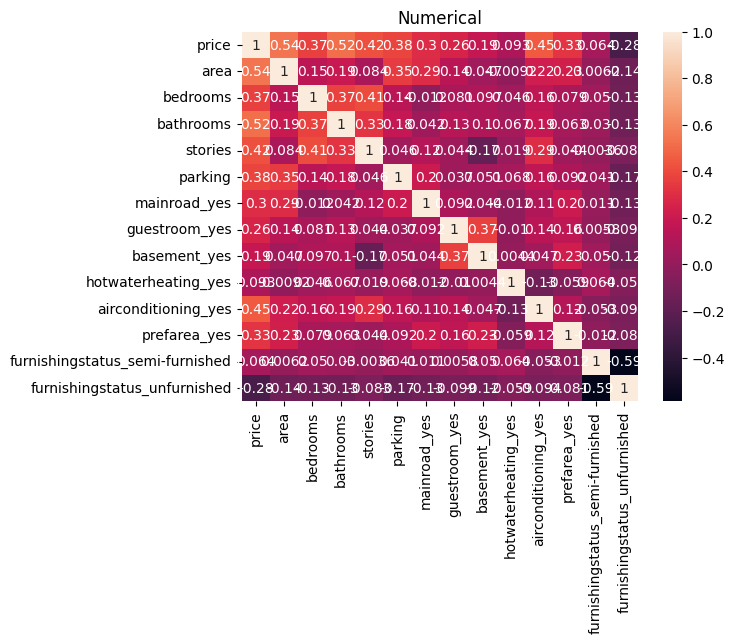

In [46]:
import seaborn as sns
sns.heatmap(corr_matrix,annot=True)
plt.title("Numerical")
plt.show()

In [30]:
corr_matrix=housing_encoded_data_frame.corr()
corr_matrix

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394,0.296898,0.255517,0.187057,0.093073,0.452954,0.329777,0.063656,-0.280587
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980,0.288874,0.140297,0.047417,-0.009229,0.222393,0.234779,0.006156,-0.142278
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270,-0.012033,0.080549,0.097312,0.046049,0.160603,0.079023,0.050040,-0.126252
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496,0.042398,0.126469,0.102106,0.067159,0.186915,0.063472,0.029834,-0.132107
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547,0.121706,0.043538,-0.172394,0.018847,0.293602,0.044425,-0.003648,-0.082972
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000,0.204433,0.037466,0.051497,0.067864,0.159173,0.091627,0.041327,-0.165705
mainroad_yes,0.296898,0.288874,-0.012033,0.042398,0.121706,0.204433,1.000000,0.092337,0.044002,-0.011781,0.105423,0.199876,0.011450,-0.133123
guestroom_yes,0.255517,0.140297,0.080549,0.126469,0.043538,0.037466,0.092337,1.000000,0.372066,-0.010308,0.138179,0.160897,0.005821,-0.099023
basement_yes,0.187057,0.047417,0.097312,0.102106,-0.172394,0.051497,0.044002,0.372066,1.000000,0.004385,0.047341,0.228083,0.050284,-0.117935
hotwaterheating_yes,0.093073,-0.009229,0.046049,0.067159,0.018847,0.067864,-0.011781,-0.010308,0.004385,1.000000,-0.130023,-0.059411,0.063819,-0.059194


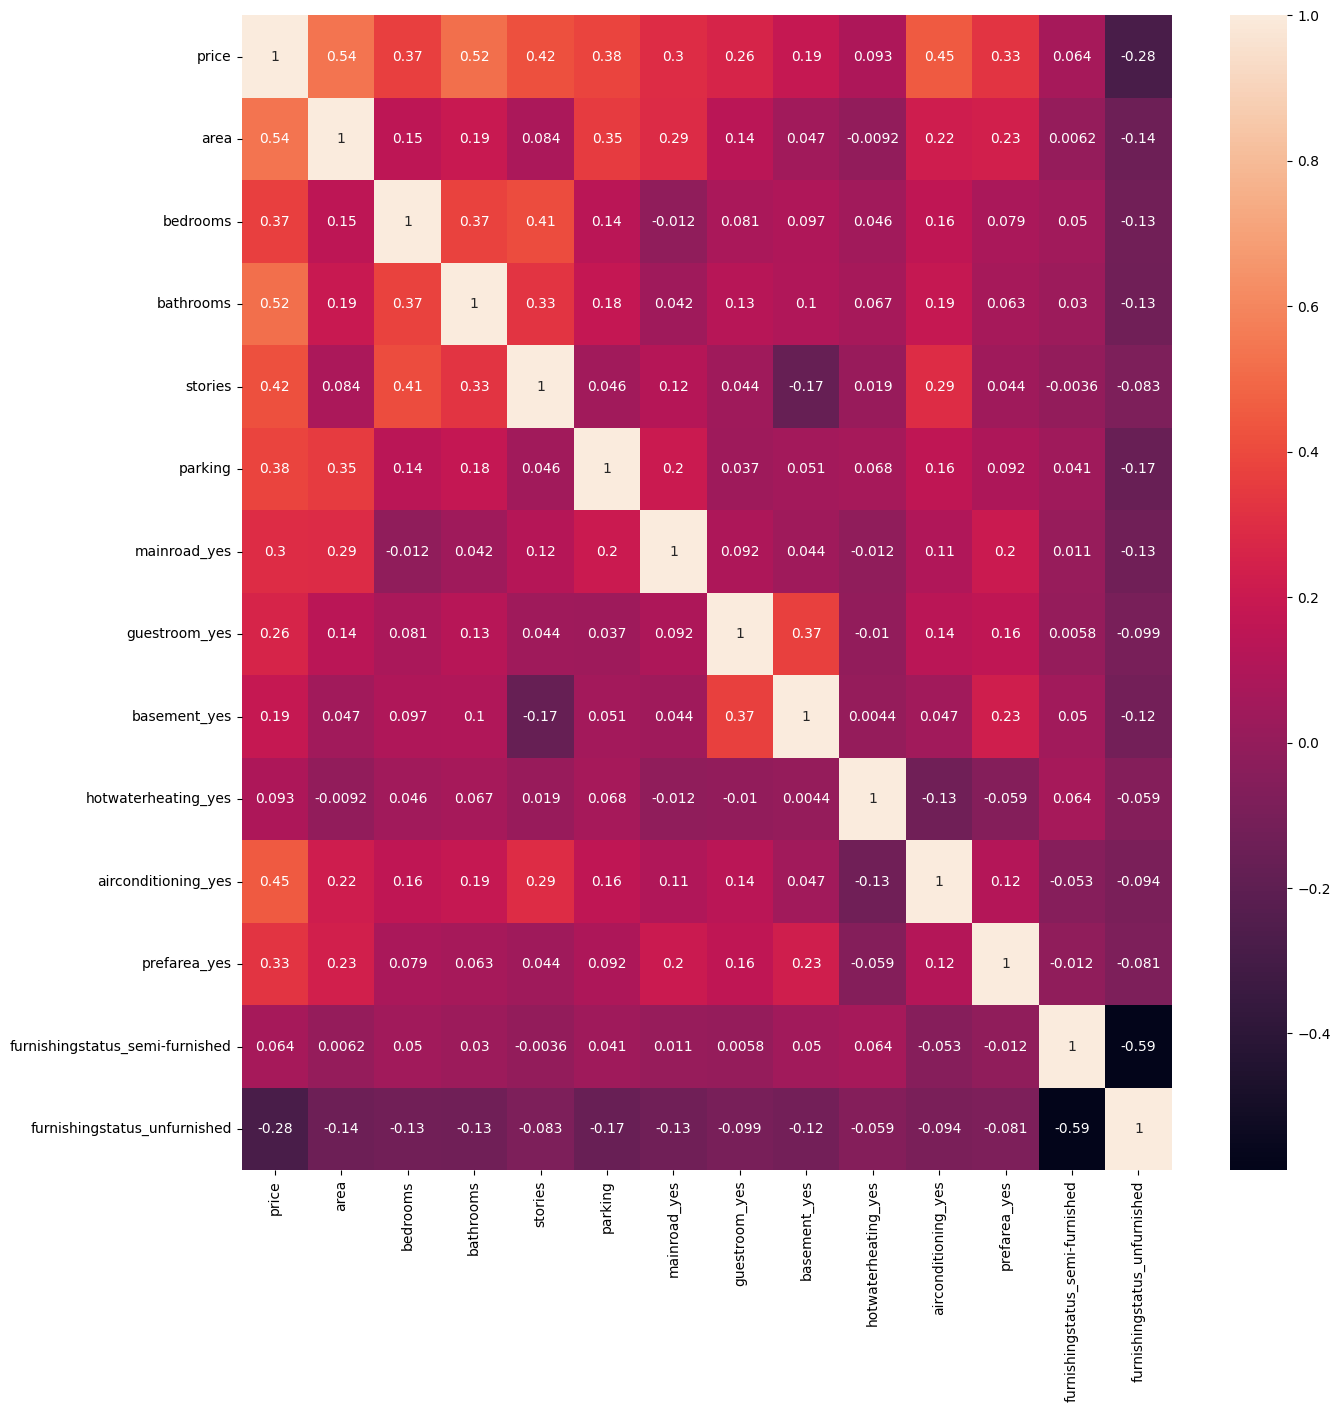

In [31]:
plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix,annot=True)
plt.show()

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,f1_score,accuracy_score

In [50]:
X,Y=housing_encoded_data_frame.drop("price",axis=1),housing_encoded_data_frame["price"]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [51]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [52]:
predictions=model.predict(X_test)
predictions

array([5164653.90033967, 7224722.29802166, 3109863.24240338,
       4612075.32722559, 3294646.25725955, 3532275.09556558,
       5611774.56836476, 6368145.98732718, 2722856.95689985,
       2629405.61585782, 9617039.5031558 , 2798087.30447888,
       3171096.76847063, 3394639.09125528, 3681088.65424275,
       5263187.74621485, 3035963.47612384, 4786122.8004005 ,
       4349551.9200572 , 3572362.09930451, 5774875.21395649,
       5886993.57919883, 2730836.19518458, 4727316.47323635,
       5244847.52716801, 7555324.21605603, 3220790.84680268,
       5191898.79934206, 8143726.91009786, 3398814.09825035,
       6490693.05027925, 3315105.9074781 , 6708457.36761326,
       4201738.21071676, 3557571.06735186, 5836974.50478626,
       4808660.67448475, 4362878.73613261, 3191242.95701508,
       4596554.93225238, 4566042.86048411, 3517779.52374148,
       7205844.79365835, 3983597.27861103, 3749338.70271056,
       4274731.09125895, 6757442.10783741, 4037320.43665851,
       3769334.90397126,

In [53]:
mean_absolute_error(Y_test,predictions)

970043.4039201636

In [56]:
mean_squared_error(predictions,Y_test)

1754318687330.6638

In [55]:
r2_score(Y_test,predictions)

0.6529242642153184

In [39]:
model.coef_

array([ 2.35968805e+02,  7.67787016e+04,  1.09444479e+06,  4.07476595e+05,
        2.24841913e+05,  3.67919948e+05,  2.31610037e+05,  3.90251176e+05,
        6.84649885e+05,  7.91426736e+05,  6.29890565e+05, -1.26881818e+05,
       -4.13645062e+05])

In [57]:
model.intercept_

np.float64(260032.35760741215)

###Standradization


In [59]:
from sklearn.preprocessing import StandardScaler

In [67]:
scaler=StandardScaler()
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [68]:

X_train

array([[ 0.38416819,  0.05527092,  1.53917323, ..., -0.55262032,
        -0.870669  , -0.67690027],
       [ 0.9291807 ,  0.05527092,  1.53917323, ..., -0.55262032,
         1.14854209, -0.67690027],
       [-0.60775457, -1.28351359, -0.5579503 , ..., -0.55262032,
        -0.870669  , -0.67690027],
       ...,
       [-0.29709744,  0.05527092,  1.53917323, ..., -0.55262032,
        -0.870669  , -0.67690027],
       [-0.5060189 , -1.28351359, -0.5579503 , ..., -0.55262032,
        -0.870669  ,  1.47732249],
       [ 0.15707965,  0.05527092,  1.53917323, ..., -0.55262032,
         1.14854209, -0.67690027]])

In [69]:
model=LinearRegression()
model.fit(X_train,Y_trains)
model.predict(X_test)

array([5164653.90033967, 7224722.29802166, 3109863.24240338,
       4612075.3272256 , 3294646.25725956, 3532275.09556558,
       5611774.56836474, 6368145.98732718, 2722856.95689986,
       2629405.61585783, 9617039.50315578, 2798087.30447888,
       3171096.76847064, 3394639.09125529, 3681088.65424276,
       5263187.74621486, 3035963.47612386, 4786122.8004005 ,
       4349551.9200572 , 3572362.09930451, 5774875.2139565 ,
       5886993.57919883, 2730836.19518459, 4727316.47323636,
       5244847.52716799, 7555324.21605601, 3220790.84680269,
       5191898.79934207, 8143726.91009782, 3398814.09825036,
       6490693.05027925, 3315105.90747811, 6708457.36761325,
       4201738.21071676, 3557571.06735186, 5836974.50478626,
       4808660.67448475, 4362878.73613262, 3191242.95701508,
       4596554.93225239, 4566042.8604841 , 3517779.52374149,
       7205844.79365835, 3983597.27861103, 3749338.70271055,
       4274731.09125895, 6757442.10783741, 4037320.43665851,
       3769334.90397125,

In [70]:
print("coef",model.coef_)
print("interceptor",model.intercept_)

coef [ 519552.41633999   57349.55941862  521879.02774805  349251.43890557
  192005.95366749  128498.62821472   88768.66768638  187067.80321388
  149862.70299085  365157.39385091  266656.3519933   -62837.32186493
 -192015.91798221]
interceptor 4706527.385321101


In [71]:
print("Square Error",mean_squared_error(Y_test,predictions))
print("Mean Absolute Error",mean_absolute_error(Y_test,predictions))
print("R2 Score",r2_score(Y_test,predictions))

Square Error 1754318687330.6638
Mean Absolute Error 970043.4039201636
R2 Score 0.6529242642153184


In [72]:
from sklearn.preprocessing import MinMaxScaler

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

model=LinearRegression()
model.fit(X_train,Y_train)
predictions=model.predict(X_test)
print("coef",model.coef_)
print("interceptor",model.intercept_)
print("Square Error",mean_squared_error(Y_test,predictions))
print("Mean Absolute Error",mean_absolute_error(Y_test,predictions))
print("R2 Score",r2_score(Y_test,predictions))

coef [3433346.10607724  383893.50817189 3283334.35830179 1222429.78495474
  674525.73982988  367919.94767957  231610.03717565  390251.17618109
  684649.88533878  791426.73584318  629890.56531336 -126881.81758511
 -413645.06222822]
interceptor 2228080.9678206174
Square Error 1754318687330.669
Mean Absolute Error 970043.4039201646
R2 Score 0.6529242642153175


After Removing Outliers


In [79]:
numerical = housing_data_frame.select_dtypes(exclude="object").columns
for col in numerical:
   Q1=housing_encoded_data_frame[col].quantile(0.25)
   Q3=housing_encoded_data_frame[col].quantile(0.75)
   IQR=Q3-Q1
   lower_bound=Q1-1.5*IQR
   upper_bound=Q3+1.5*IQR
   housing_encoded_data_frame[col]=housing_encoded_data_frame[col].clip(lower=lower_bound,upper=upper_bound)
housing_encoded_data_frame

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,9205000,7420,4.0,2.0,3.0,2.0,True,False,False,False,True,True,False,False
1,9205000,8960,4.0,3.5,3.5,2.5,True,False,False,False,True,False,False,False
2,9205000,9960,3.0,2.0,2.0,2.0,True,False,True,False,False,True,True,False
3,9205000,7500,4.0,2.0,2.0,2.5,True,False,True,False,True,True,False,False
4,9205000,7420,4.0,1.0,2.0,2.0,True,True,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2.0,1.0,1.0,2.0,True,False,True,False,False,False,False,True
541,1767150,2400,3.0,1.0,1.0,0.0,False,False,False,False,False,False,True,False
542,1750000,3620,2.0,1.0,1.0,0.0,True,False,False,False,False,False,False,True
543,1750000,2910,3.0,1.0,1.0,0.0,False,False,False,False,False,False,False,False


In [88]:
fig=make_subplots(rows=3,cols=2);
fig.add_trace(go.Box(x=housing_encoded_data_frame["price"],name="Price"),row=1,col=1)
fig.add_trace(go.Box(x=housing_encoded_data_frame["area"],name="area"),row=1,col=2)
fig.add_trace(go.Box(x=housing_encoded_data_frame["bedrooms"],name="Bedrooms"),row=2,col=1)
fig.add_trace(go.Box(x=housing_encoded_data_frame["bathrooms"],name="Bathrooms"),row=2,col=2)
fig.add_trace(go.Box(x=housing_encoded_data_frame["stories"],name="Stories"),row=3,col=1)
fig.add_trace(go.Box(x=housing_encoded_data_frame["parking"],name="Parking"),row=3,col=2)
fig.update_layout(width=800,height=1100,showlegend=False)
fig.show()

In [89]:
X,Y=housing_encoded_data_frame.drop("price",axis=1),housing_encoded_data_frame["price"]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [90]:

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

model=LinearRegression()
model.fit(X_train,Y_train)
predictions=model.predict(X_test)
print("coef",model.coef_)
print("interceptor",model.intercept_)
print("Square Error",mean_squared_error(Y_test,predictions))
print("Mean Absolute Error",mean_absolute_error(Y_test,predictions))
print("R2 Score",r2_score(Y_test,predictions))

coef [2258906.39356844  218590.79059958 2547189.04103749 1080628.42167476
  490617.94570839  374057.16425434  239027.31576982  350621.91763725
  715118.5706187   762723.72533106  586645.64995851  -97044.02541513
 -389033.40158934]
interceptor 2219902.8649708843
Square Error 1329564285689.7036
Mean Absolute Error 907826.2642066205
R2 Score 0.6708911213003366


In [91]:
X,Y=housing_encoded_data_frame.drop("price",axis=1),housing_encoded_data_frame["price"]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

model=LinearRegression()
model.fit(X_train,Y_train)
predictions=model.predict(X_test)
print("coef",model.coef_)
print("interceptor",model.intercept_)
print("Square Error",mean_squared_error(Y_test,predictions))
print("Mean Absolute Error",mean_absolute_error(Y_test,predictions))
print("R2 Score",r2_score(Y_test,predictions))

coef [ 515247.61847859   43863.87239484  479717.77420313  332988.30504575
  162604.82151839  130642.09424826   91611.47168008  168071.42654351
  156531.97969768  351914.07512082  248349.153877    -48060.36653746
 -180591.07324894]
interceptor 4679715.458715596
Square Error 1316967767891.6553
Mean Absolute Error 880729.6106126519
R2 Score 0.6740091546986882
